<!-- <img src="./images/DLI_Header.png" style="width: 400px;"> -->
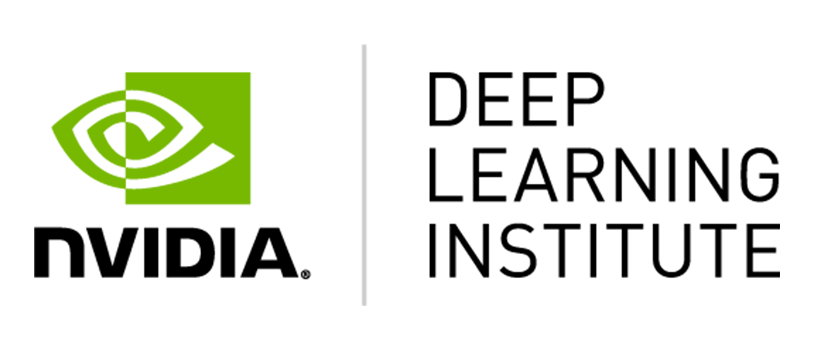

# 미국 수화 데이터세트 이미지 분류

이 섹션에서는 지난 섹션에서 살펴본 데이터 준비, 모델 생성 및 모델 트레이닝 단계를 수행할 예정이며, 이번에는 지난 번과 다른 데이터세트인 [미국 수화](http://www.asl.gs/)의 수화 문자 이미지를 사용하겠습니다.

## 목표

* 트레이닝을 위한 이미지 데이터 준비
* 이미지 분류를 위한 단순 모델 생성 및 컴파일
* 이미지 분류 모델 트레이닝 및 결과 관찰

## 미국 수화 데이터세트

[미국 수화 알파벳](http://www.asl.gs/)에는 26개의 문자가 포함되어 있습니다. 이 중 두 개의 문자(j 및 z)에는 동작이 요구되므로 트레이닝 데이터세트에 포함되지 않았습니다.  

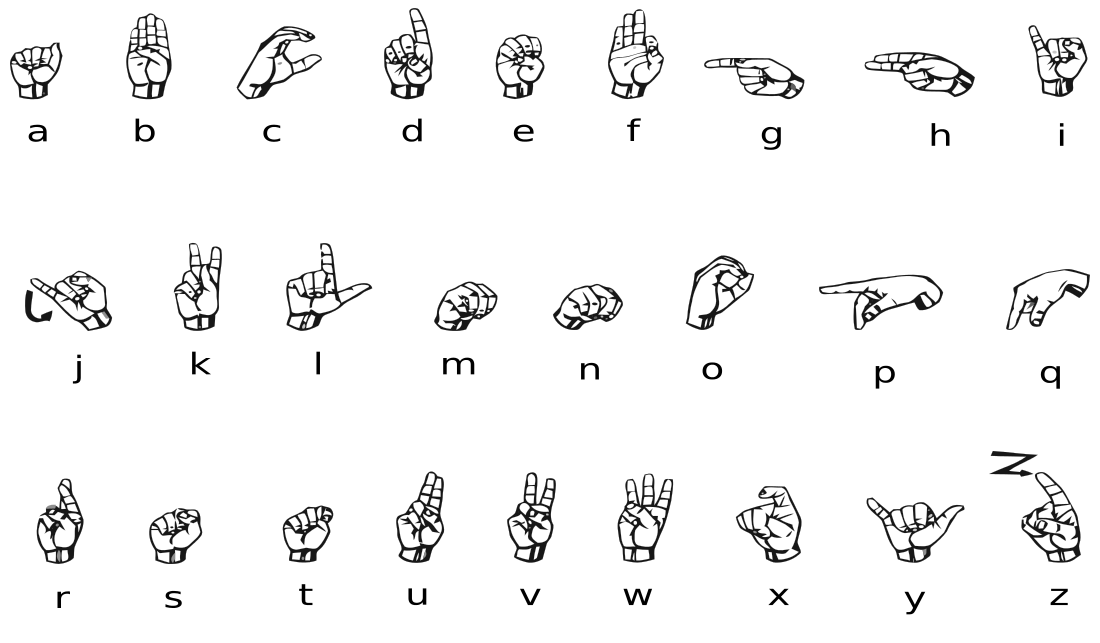

### Kaggle

이 데이터세트는 데이터세트와 기타 딥러닝 리소스를 찾기에 아주 좋은 웹사이트인 [Kaggle](http://www.kaggle.com)에서 제공됩니다. 노트북에서 본 데이터세트와 "커널" 등의 리소스를 제공하는 것 외에도, Kaggle은 다른 이들과 매우 정확한 모델을 트레이닝하는 경쟁을 할 수 있는 경진대회도 주관합니다.

연습을 하고 싶거나 다수의 딥러닝 프로젝트 사례를 확인하고 싶은 경우 Kaggle을 방문하면 좋습니다.

## 데이터 로드

:이 데이터세트는 MNIST와 동일한 방식으로 Keras를 통해 제공되지 않으므로 맞춤형 데이터를 로드하는 방법을 알아보겠습니다. 이 섹션이 끝날 무렵에는 앞서와 같이 **x_train**, **y_train**, **x_valid** 및 **y_valid** 변수를 보유하게 됩니다.

### 데이터 읽기

수화 데이터세트는 Microsoft Excel과 Google Sheet의 기반이 되는 동일한 데이터 구조인 [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)(Comma Separated Values) 형식으로 되어 있습니다. 이는 [트레이닝](asl_data/sign_mnist_train.csv) 및 [검증](asl_data/sign_mnist_valid.csv) 데이터세트에서 보이는 것처럼 상단에 레이블이 있는 행과 열로 이루어진 그리드입니다(로드하는 데 약간의 시간이 소요될 수 있음).

데이터를 로드하여 작업하기 위해 데이터 로드 및 조작을 위한 고성능 툴인 [Pandas](https://pandas.pydata.org/)라는 라이브러리를 사용하겠습니다. CSV 파일은 [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)이라는 형식으로 읽게 됩니다.

In [1]:
!git clone https://github.com/jhkim3217/data.git

Cloning into 'data'...
remote: Enumerating objects: 13808, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13808 (delta 1), reused 6 (delta 1), pack-reused 13802
Receiving objects: 100% (13808/13808), 1.83 GiB | 34.02 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (13777/13777), done.


In [1]:
!pwd

/Users/jhkim/내 드라이브(jhkim3217@gmail.com)/강의자료/창원AI교육/Resource/02_Deep_Learning_basic/Source


Pandas에는 csv 파일을 예상하고 DataFrame을 반환하는 [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 메서드가 있습니다.

In [4]:
import pandas as pd

train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

### 데이터 살펴보기

데이터를 살펴보겠습니다. [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) 메서드를 사용하여 DataFrame의 처음 행 몇 개를 출력할 수 있습니다. 각 행은 `label` 열, 그리고 MNIST 데이터세트처럼 이미지의 각 픽셀 값을 나타내는 784개의 값을 지닌 이미지입니다. 보시다시피 레이블은 현재 알파벳 문자가 아닌 숫자 값입니다.

In [5]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,12,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,22,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,17,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,16,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
valid_df.tail(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7162,9,130,131,131,134,133,135,137,136,136,...,128,106,107,63,11,147,194,182,176,124
7163,4,158,161,165,169,172,175,177,179,181,...,78,122,141,141,141,140,141,142,143,144
7164,13,141,144,146,149,153,156,158,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,8,158,160,160,161,161,161,164,162,162,...,177,178,176,174,173,172,171,169,169,167
7166,11,169,173,177,181,183,186,189,191,194,...,36,27,14,35,40,15,8,27,42,41
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,11,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63
7171,2,173,174,173,174,173,173,175,175,174,...,201,200,197,198,198,197,195,195,193,192


### 레이블 추출

In [ ]:
print(train_df.describe())

              label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      11.679476    145.419377    148.500273    151.247714    153.546531   
std        6.880558     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       12.000000    150.000000    153.000000    156.000000    158.000000   
75%       18.000000    174.000000    176.000000    178.000000    179.000000   
max       23.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392    

MNIST와 마찬가지로, 트레이닝 및 검증 레이블을 **y_train** 및 **y_valid** 변수에 저장하려고 합니다. 여기서는 해당 변수를 생성한 다음 레이블이 더 이상 필요없는 데이터프레임 원본에서 레이블을 삭제합니다.

In [6]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

### 이미지 추출

MNIST와 마찬가지로, 트레이닝 및 검증 이미지를 
**x_train** 및 **x_valid** 변수에 저장하려고 합니다. 여기서는 해당 변수를 생성합니다.

In [7]:
x_train = train_df.values
x_valid = valid_df.values

In [8]:
# print(x_train)
print(len(x_train))
print(len(x_train[0]))

27455
784


In [ ]:
print(len(y_train))
print(y_train[0])

27455
3


### 트레이닝 및 검증 데이터 요약

In [ ]:
x_train[0]

array([0.41960784, 0.4627451 , 0.49803922, 0.5254902 , 0.54509804,
       0.56078431, 0.57254902, 0.58823529, 0.6       , 0.61176471,
       0.61960784, 0.62745098, 0.63921569, 0.64705882, 0.62352941,
       0.65098039, 0.65882353, 0.66666667, 0.66666667, 0.67058824,
       0.67058824, 0.67058824, 0.6745098 , 0.67058824, 0.67058824,
       0.66666667, 0.66666667, 0.6627451 , 0.43529412, 0.4745098 ,
       0.50588235, 0.52941176, 0.55294118, 0.56470588, 0.58039216,
       0.59215686, 0.60392157, 0.61568627, 0.62745098, 0.63921569,
       0.64313725, 0.66666667, 0.46666667, 0.59607843, 0.67058824,
       0.67058824, 0.66666667, 0.67058824, 0.6745098 , 0.6745098 ,
       0.6745098 , 0.6745098 , 0.6745098 , 0.67058824, 0.67058824,
       0.66666667, 0.44313725, 0.48235294, 0.51372549, 0.5372549 ,
       0.55686275, 0.56862745, 0.58823529, 0.59607843, 0.60784314,
       0.61960784, 0.63137255, 0.63921569, 0.64313725, 0.6745098 ,
       0.41176471, 0.55686275, 0.66666667, 0.67058824, 0.67058

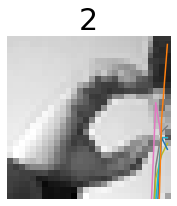

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
row = x_train[3]
label = y_train[3]
image = row.reshape(28,28)
plt.plot(image)
plt.title(label, fontdict={'fontsize': 30})
plt.axis('off')
plt.imshow(image, cmap='gray')

이제 트레이닝을 위한 각각 784개 픽셀을 포함하는 27,455개의 이미지와

In [ ]:
x_train.shape

(27455, 784)

해당 레이블이 준비되었습니다.

In [ ]:
y_train.shape

(27455,)

검증을 위해서는 7,172개의 이미지와

In [ ]:
x_valid.shape

(7172, 784)

해당 레이블이 있습니다.

In [ ]:
y_valid.shape

(7172,)

## 데이터 시각화

이미지를 시각화하기 위해 다시 한 번 matplotlib 라이브러리를 사용하겠습니다. 이러한 시각화의 세부적인 내용에 대해서는 걱정할 필요가 없지만 만약 관심이 있다면 나중에 [matplotlib](https://matplotlib.org/)에 대해 자세히 알아볼 수 있습니다.

이미지를 이해하기 위해서는 현재 784개 픽셀로 이루어진 1D 모양을 28x28픽셀로 이루어진 2D 모양으로 재구성해야 합니다.

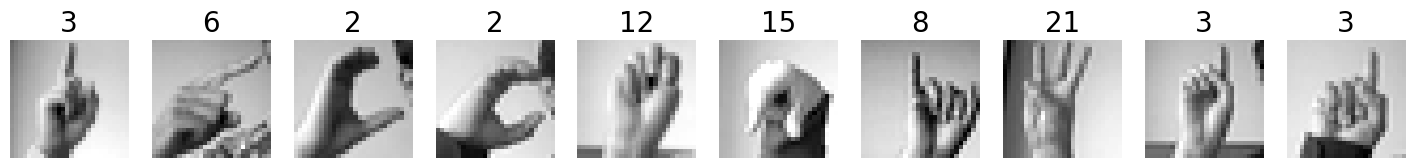

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))

num_images = 10
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1) # nrows=1, ncols=num_images, index=i+1
    plt.title(label, fontdict={'fontsize': 20})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## 연습: 이미지 데이터 정규화

MNIST 데이터세트에서 했던 것처럼 이미지 데이터를 정규화하겠습니다. 즉, 데이터의 픽셀 값이 현재처럼 0~255가 아닌

In [ ]:
x_train.min()

0

In [ ]:
x_train

In [ ]:
x_train[0]

In [ ]:
x_train.max()

255

In [8]:
x_train = x_train / 255
x_valid = x_valid / 255

In [ ]:
print(x_train)

[[0.41960784 0.4627451  0.49803922 ... 0.8        0.79607843 0.79215686]
 [0.60784314 0.61568627 0.61176471 ... 0.40392157 0.52941176 0.58431373]
 [0.73333333 0.7372549  0.7372549  ... 0.76470588 0.76078431 0.76470588]
 ...
 [0.68235294 0.68235294 0.68235294 ... 0.79215686 0.78431373 0.78431373]
 [0.69411765 0.70980392 0.72156863 ... 0.25098039 0.34117647 0.36470588]
 [0.70196078 0.70588235 0.70588235 ... 0.80392157 0.81960784 0.84313725]]


0~1의 부동 소수점 값이 되어야 합니다. 다음 셀을 사용하여 작업하십시오. 문제가 생기는 경우에는 아래의 솔루션을 확인하십시오.

## 연습: 레이블 분류

MNIST 데이터세트에서 했던 것처럼 레이블을 범주 인코딩하겠습니다. 이전에 했듯이 [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) 메서드를 사용하여 여기에 인코딩할 값과 값을 인코딩할 범주 수를 전달해 범주 인코딩을 수행할 수 있습니다. 아래 셀에서 작업을 수행하십시오. **keras**를 가져와 범주 수(24)를 설정해 두었습니다.

In [13]:
from tensorflow import keras
num_classes = 24

In [14]:
# TODO: Categorically encode y_train and y_valid.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_train[2])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 연습: 모델 구축

데이터가 모두 준비되었고 트레이닝 및 검증을 위한 이미지를 정규화했으며 트레이닝 및 검증을 위한 레이블을 범주 인코딩했습니다.

이 연습에서는 순차 모델을 구축하겠습니다. 지난 번에 했던 대로, 다음과 같은 모델을 구축합니다.
* 밀집 입력 레이어를 지님. 이 레이어는 512개의 뉴런을 포함하고 **relu** 활성화 함수를 사용하고 **(784,)** 모양을 가진 입력 이미지를 예상해야 합니다.
* 512개의 뉴런을 포함하고 **relu** 활성화 함수를 사용하는 두 번째 밀집 레이어를 지님
* 뉴런 수가 클래스와 동일하고 **softmax** 활성화 함수를 사용하는 밀집 출력 레이어를 지님

아래 셀에서 작업을 수행해 모델을 저장할 **model** 변수를 생성하십시오. 바로 시작할 수 있도록 Keras [순차](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) 모델 클래스와 [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 레이어 클래스를 가져왔습니다. 아래 솔루션을 표시하여 힌트를 얻을 수 있습니다.

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# TODO: build a model following the guidelines above.
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
# model.add(Dense(units = 512, activation='relu', input_dim=784)) # 입력 데이터의 차원이 2 이상일때 
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

## 모델 요약

아래 셀을 실행하여 방금 생성한 모델을 요약하십시오.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

전과 같은 옵션으로 모델을 [컴파일](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile)하며, [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)를 사용하여 다수의 범주 중 하나에 맞추고 싶다는 사실을 반영하고 모델의 정확도를 측정하겠습니다.

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## 연습: 모델 트레이닝

모델의 `fit` 메서드를 사용하여 위에서 생성한 트레이닝 및 검증 이미지와 레이블로 20에포크 동안 트레이닝하십시오.

In [ ]:
# TODO: Train the model for 20 epochs.
hist = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 [==============================] - 8s 4ms/step - loss: 1.9574 - accuracy: 0.3840 - val_loss: 1.5152 - val_accuracy: 0.5045
Epoch 2/10
858/858 [==============================] - 4s 5ms/step - loss: 0.9584 - accuracy: 0.6757 - val_loss: 1.5099 - val_accuracy: 0.5431
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 0.5806 - accuracy: 0.8040 - val_loss: 0.7774 - val_accuracy: 0.7637
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 0.3836 - accuracy: 0.8759 - val_loss: 2.0631 - val_accuracy: 0.5530
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2835 - accuracy: 0.9140 - val_loss: 1.0401 - val_accuracy: 0.7744
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2256 - accuracy: 0.9352 - val_loss: 0.9533 - val_accuracy: 0.8122
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.1994 - accuracy: 0.9477 - val_loss: 0.8146 - val_accuracy: 0.8451
Epoch 

{'loss': [1.9574118852615356, 0.9584116339683533, 0.5806275606155396, 0.3835773169994354, 0.28351807594299316, 0.2255593091249466, 0.19943773746490479, 0.183661088347435, 0.15667608380317688, 0.1608753204345703], 'accuracy': [0.38404661417007446, 0.6756874918937683, 0.8040429949760437, 0.8759424686431885, 0.9140047430992126, 0.9352394938468933, 0.9477326273918152, 0.9568749070167542, 0.9609178900718689, 0.9656528830528259], 'val_loss': [1.515176773071289, 1.5098989009857178, 0.7774057984352112, 2.0630619525909424, 1.0401113033294678, 0.9533204436302185, 0.8146123886108398, 0.9147965312004089, 1.1429766416549683, 0.9070831537246704], 'val_accuracy': [0.5044618248939514, 0.5430842041969299, 0.7636642456054688, 0.552983820438385, 0.7744004726409912, 0.8121863007545471, 0.8450919985771179, 0.8043781518936157, 0.8084216117858887, 0.8282208442687988]}


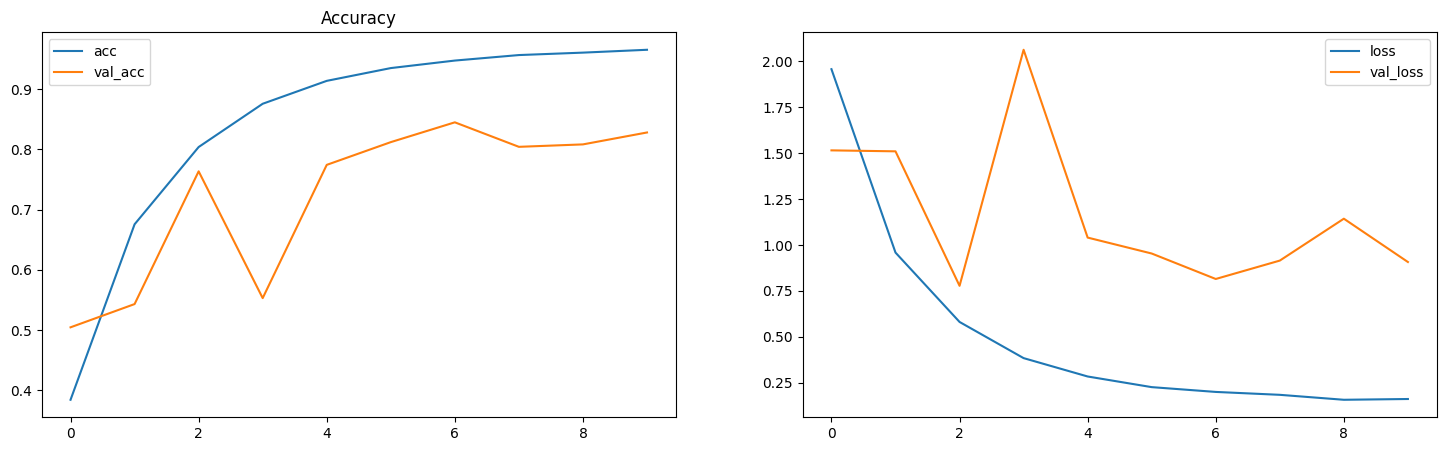

In [ ]:
print(hist.history)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show('Loss')

plt.show()

## 논의: 어떻게 됐습니까?

트레이닝 정확도는 꽤 높은 수준에 도달했지만 검증 정확도는 그 정도로 높지 않다는 사실을 확인할 수 있습니다. 어떻게 된 걸까요?

아래의 '...'을 클릭하여 정답을 표시하기 전에 잠시 생각해 보십시오.

이는 트레이닝 데이터 분류를 위한 모델 학습의 예시이지만 아직 트레이닝되지 않은 새 데이터에 대한 성능은 저조합니다. 근본적으로는 데이터세트를 기억하지만 문제에 대한 확고하고 전반적인 이해도는 얻지 못하고 있습니다. 이는 *과적합*이라 불리는 일반적이 문제입니다. 다음 두 개의 강의에서는 과적합, 그리고 이를 해결할 수 있는 몇 가지 방법에 대해 설명하겠습니다.

## 요약

이 섹션에서는 직접 뉴럴 네트워크를 구축하여 상당히 정확한 이미지 분류를 수행해 보았습니다. 축하합니다!

이제 데이터(레이블 포함)를 로드하고 준비하고 모델을 생성한 다음 준비한 데이터로 모델을 트레이닝하는 과정이 어느 정도는 익숙해졌을 것입니다.

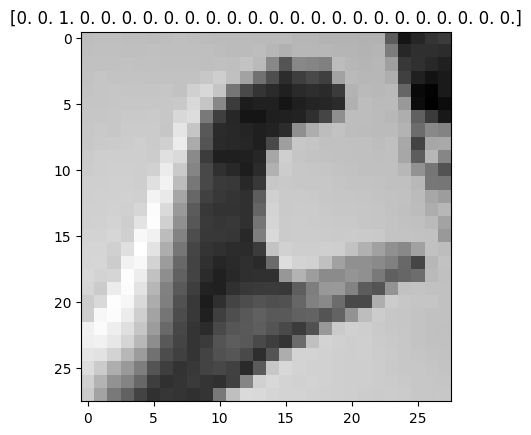

In [ ]:
x_train = x_train.reshape(27455, 28, 28)
plt.title(np.argmax(y_train[2]))
plt.imshow(x_train[2], cmap='gray')
plt.show()

In [ ]:
pred = model.predict(x_train[0].reshape(1,784))
print(pred)

1/1 [==============================] - 0s 31ms/step
[[1.39499841e-31 1.08224619e-27 2.45292589e-16 9.93017316e-01
  4.42370490e-29 2.41362568e-16 4.93553642e-10 1.39470792e-13
  1.84212598e-15 1.36740974e-11 1.26928546e-06 6.03778754e-25
  9.20049912e-30 9.57616010e-17 2.72557902e-25 2.89658103e-10
  1.68701678e-10 6.22910840e-27 1.31442093e-07 1.29617118e-12
  2.07150137e-08 6.76627602e-20 6.98118750e-03 3.93141552e-12]]


In [ ]:
import numpy as np
print(np.argmax(pred))

3


## 다음

아주 기본적이지만 어느 정도는 효과적인 모델을 구성해 보았으니 이제 *CNN(Convolutional Neural Network)*을 비롯한 좀 더 복잡한 모델에 대해 알아보겠습니다.

이어서 다음 섹션인 [*ASL과 CNN*](./03_asl_cnn.ipynb)을 진행해 주시기 바랍니다.